# Tracking Control Tests

Analyze results from `autonomous_test.py`.

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
mpl.style.use('mitch-exp')

In [128]:
import exc_analysis.plotting as excplt

In [129]:
ls

SISO Controllers.ipynb    auto_tustin.csv           string-pot.ipynb
auto_4.csv                dh_kinematics.html        tracking-control.ipynb
auto_5.csv                figs/                     valve-pwm-velocity.ipynb
auto_7.csv                img/                      vel_test_1.csv
auto_test.csv             pot_calibrate_05_11.csv   vel_test_2.csv
auto_test_db_2.csv        rotary-valve-gain.ipynb   vel_test_sw.csv
auto_test_db_comp.csv     single-actuator.ipynb


In [130]:
data = pd.read_csv('auto_tustin.csv')
data.set_index('Total Time', inplace=True)
data.head()

,Traj Time,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Error,Stick Error,Bucket Error,Swing Error,Boom Ref,Stick Ref,Bucket Ref,Swing Ref
Total Time,,,,,,,,,,,,,,,,,
4.548991,0.000414,9.660000,8.543423,3.24,0.0,8.365000,8.785339,5.398248,7.5,8.619239e-11,0.033731,-0.020000,0.0,9.660000,8.577154,3.220000,0.0
4.600987,0.052410,9.660000,8.543423,3.24,0.0,8.366445,5.057154,8.974893,7.5,1.651827e-04,0.033450,-0.020107,0.0,9.660165,8.576873,3.219893,0.0
4.653804,0.105227,9.616286,8.543423,3.24,0.0,8.755995,8.780699,5.391274,7.5,4.497523e-02,0.031590,-0.020816,0.0,9.661261,8.575013,3.219184,0.0
4.708273,0.159696,9.660000,8.543423,3.24,0.0,5.171438,5.041562,8.963745,7.5,4.142492e-03,0.026699,-0.022680,0.0,9.664142,8.570122,3.217320,0.0
4.758650,0.210073,9.616286,8.543423,3.22,0.0,9.400000,8.760016,5.499938,7.5,5.260370e-02,0.018641,-0.005752,0.0,9.668889,8.562064,3.214248,0.0


In [131]:
dfs = []

for i, idx in enumerate(np.where(data['Traj Time'] < 0.05)[0][:-1]):
    dfs.append(data.iloc[idx: np.where(data['Traj Time'] < 0.05)[0][i + 1]])

dfs[1].head()

,Traj Time,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Error,Stick Error,Bucket Error,Swing Error,Boom Ref,Stick Ref,Bucket Ref,Swing Ref
Total Time,,,,,,,,,,,,,,,,,
7.525677,0.000802,9.66,8.138654,3.22,0.000000,4.800000,9.300000,9.481692,8.100000,-7.282033e-10,0.303577,1.117407e-09,8.098081e-10,9.660000,8.442231,3.220000,8.098081e-10
7.576333,0.051458,9.66,8.104923,3.22,0.000000,9.332290,4.500000,4.800000,8.112205,-1.851458e-04,0.336758,2.841030e-04,2.058949e-04,9.659815,8.441681,3.220284,2.058949e-04
7.627114,0.102239,9.66,8.104923,3.22,0.000000,4.800000,9.167683,9.491654,8.171433,-1.396890e-03,0.333163,2.143504e-03,1.553438e-03,9.658603,8.438086,3.222144,1.553438e-03
7.677819,0.152944,9.66,8.138654,3.22,0.000982,9.313453,4.500000,4.820108,8.203605,-4.495552e-03,0.290237,6.898347e-03,4.017616e-03,9.655504,8.428890,3.226898,4.999364e-03
7.728452,0.203577,9.66,8.104923,3.20,0.000982,4.800000,9.300000,9.600000,8.450081,-1.018482e-02,0.307085,3.562843e-02,1.034448e-02,9.649815,8.412008,3.235628,1.132622e-02


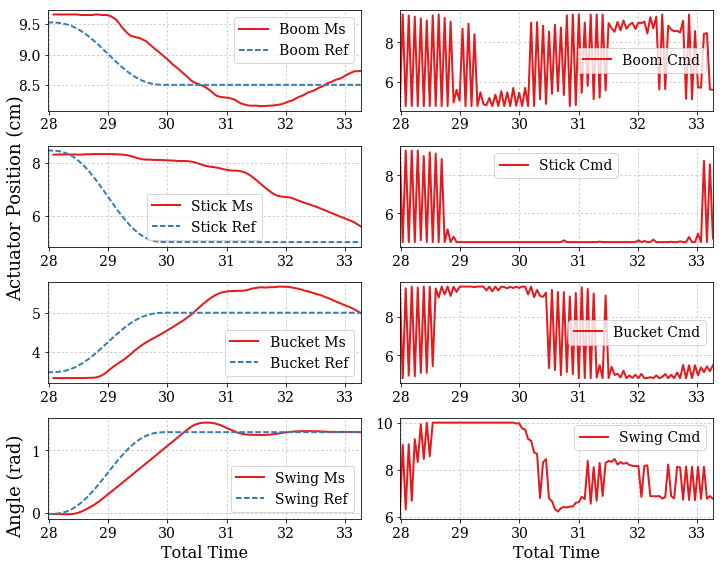

In [139]:
tr = 5
fig = plt.figure(figsize=(10, 8))

for i, lbl in enumerate(excplt.labels):
    ax = plt.subplot(4, 2, 2 * i + 1)
    dfs[tr][[lbl + ' Ms']].rolling(window=5, min_periods=3).mean().plot(ax=ax)
    dfs[tr][[lbl + ' Ref']].plot(ax=ax, linestyle='--')
    if i != 3:
        ax.xaxis.label.set_visible(False)
    
    ax = plt.subplot(4, 2, (i + 1) * 2)
    dfs[tr][[lbl + ' Cmd']].plot(ax=ax)
    if i != 3:
        ax.xaxis.label.set_visible(False)

fig.text(0, 0.65, 'Actuator Position (cm)', fontsize=18, verticalalignment='center', rotation='vertical')
fig.text(0, 0.15, 'Angle (rad)', fontsize=18, verticalalignment='center', rotation='vertical')
plt.tight_layout()
plt.savefig('figs/control_tustin_ziegler.pdf')

## Got to improve this!